In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 会員個別送付モデル

In [4]:
cust_df = pd.read_csv("data/customers.csv")
prob_df = pd.read_csv("data/visit_probability.csv")
send_dm_df = pd.read_csv("send_dm1.csv")
send_dm_df.head()

,Unnamed: 0,send_dm1,send_dm2,send_dm3
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,0.0,1.0,0.0
3,3,0.0,1.0,0.0
4,4,0.0,1.0,0.0


In [7]:
cust_send_df = pd.concat([cust_df[["customer_id", "age_cat", "freq_cat"]], send_dm_df.iloc[:, 1:]], axis=1)
cust_send_df.head()

,customer_id,age_cat,freq_cat,send_dm1,send_dm2,send_dm3
0,1,age20~34,freq2,0.0,1.0,0.0
1,2,age35~49,freq0,0.0,1.0,0.0
2,3,age35~49,freq0,0.0,1.0,0.0
3,4,age~19,freq0,0.0,1.0,0.0
4,5,age35~49,freq0,0.0,1.0,0.0


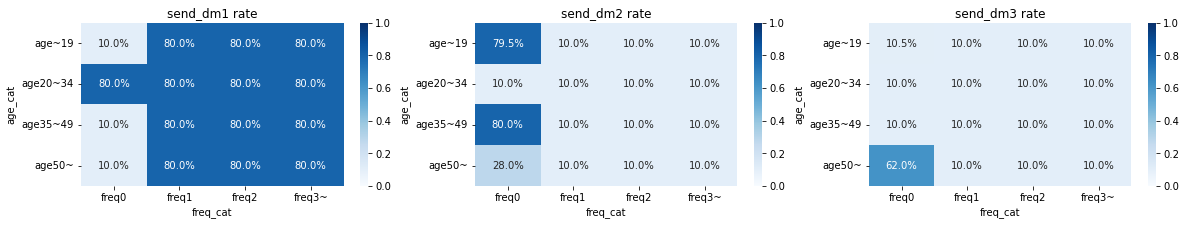

In [10]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(["send_dm1", "send_dm2", "send_dm3"]):
    cust_send_pivot_df = pd.pivot_table(data=cust_send_df, values=ptn, columns="freq_cat", index="age_cat")
    cust_send_pivot_df = cust_send_pivot_df.reindex(["age~19", "age20~34", "age35~49", "age50~"])
    sns.heatmap(cust_send_pivot_df, vmin=0, vmax=1, annot=True, fmt=".1%", cmap="Blues", ax=ax[i])
    ax[i].set_title(f"{ptn} rate")
plt.show()

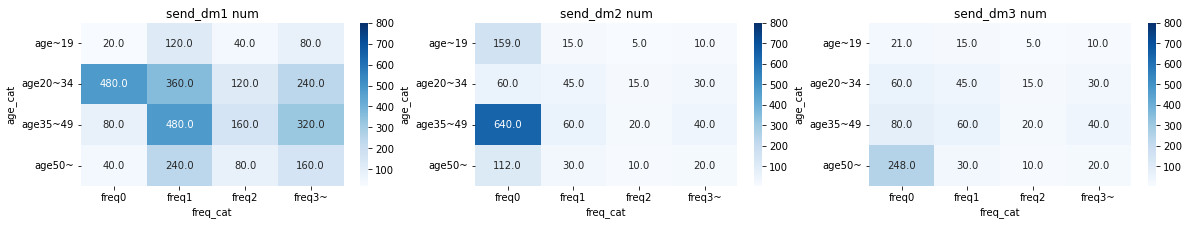

In [16]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(["send_dm1", "send_dm2", "send_dm3"]):
    cust_send_pivot_df = pd.pivot_table(data=cust_send_df, values=ptn, columns="freq_cat", index="age_cat", aggfunc="sum")
    cust_send_pivot_df = cust_send_pivot_df.reindex(["age~19", "age20~34", "age35~49", "age50~"])
    sns.heatmap(cust_send_pivot_df, vmax=800, annot=True, fmt=".1f", cmap="Blues", ax=ax[i])
    ax[i].set_title(f"{ptn} num")
plt.show()

# セグメント送付モデル

In [17]:
send_dm_df = pd.read_csv("send_dm2.csv")
send_dm_df.head()

,Unnamed: 0,send_dm1,send_dm2,send_dm3
0,0,0.1,0.8,0.1
1,1,0.8,0.1,0.1
2,2,0.8,0.1,0.1
3,3,0.8,0.1,0.1
4,4,0.8,0.1,0.1


In [18]:
seg_send_df = pd.concat([cust_df[["customer_id", "age_cat", "freq_cat"]], send_dm_df.iloc[:, 1:]], axis=1)
seg_send_df.head()

,customer_id,age_cat,freq_cat,send_dm1,send_dm2,send_dm3
0,1,age20~34,freq2,0.1,0.8,0.1
1,2,age35~49,freq0,0.8,0.1,0.1
2,3,age35~49,freq0,0.8,0.1,0.1
3,4,age~19,freq0,0.8,0.1,0.1
4,5,age35~49,freq0,0.8,0.1,0.1


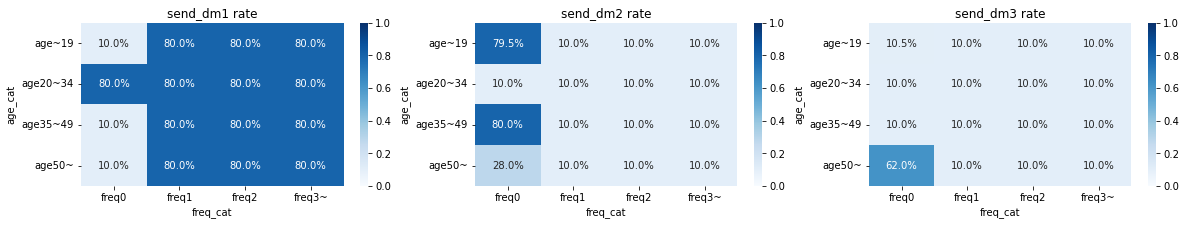

In [19]:
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1, 3, figsize=(20, 3))
for i, ptn in enumerate(["send_dm1", "send_dm2", "send_dm3"]):
    seg_send_pivot_df = pd.pivot_table(data=cust_send_df, values=ptn, columns="freq_cat", index="age_cat")
    seg_send_pivot_df = seg_send_pivot_df.reindex(["age~19", "age20~34", "age35~49", "age50~"])
    sns.heatmap(seg_send_pivot_df, vmin=0, vmax=1, annot=True, fmt=".1%", cmap="Blues", ax=ax[i])
    ax[i].set_title(f"{ptn} rate")
plt.show()